In [1]:
# Perceptron can be used in binary classification

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
X,Y = make_blobs(n_samples=1000,centers=2,n_features=2,random_state=10)

print(X.shape,Y.shape)

(1000, 2) (1000,)


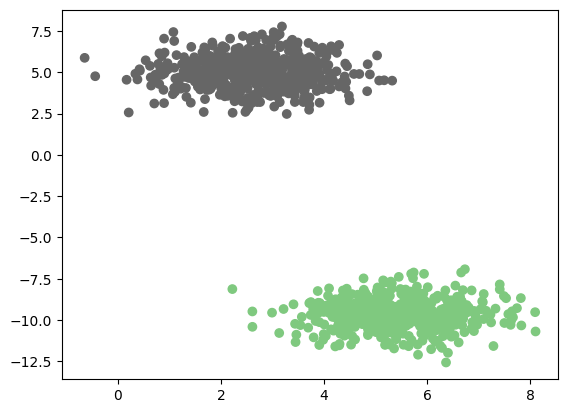

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.show()

# Model and Helper Function

In [37]:
def signoid(z):     # broadcating in numpy array is useful in this functionality , without using the for loop it iterates therough each element
  return 1.0/(1+np.exp(-z))

def predict(X, weights) :
  z = np.dot(X,weights)
  predictions = signoid(z)
  return predictions

def loss(X,Y,weights):     # Binary Cross Entrophy / Log Likeness
  predictions = predict(X,weights)
  loss = -np.mean(Y*np.log(predictions) + (1-Y)*np.log(1-predictions))
  return loss

def update(X,Y,weights,learning_rate):      # Define the update rule for one particular epoch
  predictions = predict(X,weights)
  gradient = np.dot(X.T,predictions-Y)

  m = X.shape[0]
  weights = weights - learning_rate*gradient/(float(m))
  return weights

def train(X,Y,learning_rate,max_epochs = 100):
  ones = np.ones((X.shape[0],1))
  X = np.hstack((ones,X))

  # initialise the weights
  weights = np.zeros(X.shape[1])

  # Iterate and use the update function
  for epoch in range(max_epochs):

    weights = update(X,Y,weights,learning_rate)
    # print(loss(X,Y,weights))
    if(epoch%10==0):
      l = loss(X,Y,weights)

      print("Epoch %d loss: %.4f"%(epoch,l))

  return weights

In [41]:
weights = train(X,Y,0.01,max_epochs= 500)

Epoch 0 loss: 0.5662
Epoch 10 loss: 0.2017
Epoch 20 loss: 0.1265
Epoch 30 loss: 0.0929
Epoch 40 loss: 0.0736
Epoch 50 loss: 0.0611
Epoch 60 loss: 0.0523
Epoch 70 loss: 0.0457
Epoch 80 loss: 0.0406
Epoch 90 loss: 0.0366
Epoch 100 loss: 0.0333
Epoch 110 loss: 0.0306
Epoch 120 loss: 0.0282
Epoch 130 loss: 0.0263
Epoch 140 loss: 0.0246
Epoch 150 loss: 0.0231
Epoch 160 loss: 0.0217
Epoch 170 loss: 0.0206
Epoch 180 loss: 0.0195
Epoch 190 loss: 0.0185
Epoch 200 loss: 0.0177
Epoch 210 loss: 0.0169
Epoch 220 loss: 0.0162
Epoch 230 loss: 0.0155
Epoch 240 loss: 0.0149
Epoch 250 loss: 0.0144
Epoch 260 loss: 0.0139
Epoch 270 loss: 0.0134
Epoch 280 loss: 0.0130
Epoch 290 loss: 0.0125
Epoch 300 loss: 0.0121
Epoch 310 loss: 0.0118
Epoch 320 loss: 0.0114
Epoch 330 loss: 0.0111
Epoch 340 loss: 0.0108
Epoch 350 loss: 0.0105
Epoch 360 loss: 0.0102
Epoch 370 loss: 0.0100
Epoch 380 loss: 0.0097
Epoch 390 loss: 0.0095
Epoch 400 loss: 0.0093
Epoch 410 loss: 0.0091
Epoch 420 loss: 0.0089
Epoch 430 loss: 0.0087

# Visualization and Predictions

In [40]:
def get_preds(X_test,weights, labels = True):
  if X_test.shape[1] != weights.shape[0]:
      ones = np.ones((X_test.shape[0],1))
      X_test = np.hstack((ones,X_test))
  probs = predict(X_test,weights)

  if not labels:
      return probs
  else:
      labels = np.zeros(probs.shape)
      labels[probs>=0.5] = 1
      return labels

[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]
[ 1.73604036  1.32578973  0.9155391   0.50528847  0.09503784 -0.31521279
 -0.72546341 -1.13571404 -1.54596467 -1.9562153 ]


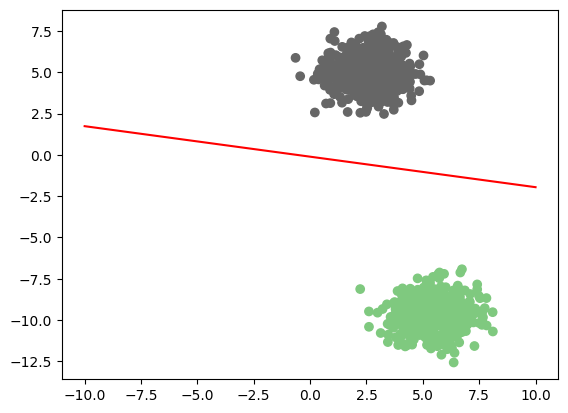

In [49]:
x1 = np.linspace(-10,10,10)
print(x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]
print(x2)

plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.plot(x1,x2, c = "red")
plt.show()

In [46]:
weights[0]

0.09068275805372217

In [ ]:
a